# Linear Regression 
Linear regression is a form of statistical analysis that shows the relationship between two or more continuous variables. It creates a predictive model using relevant data to show trends. Analysts typically use the “least square method” to create the model. There are other methods, but the least square method is the most commonly used. 
Below is a graph that depicts the relationship between the heights and weights of a sample of people. The red line is the linear regression that shows the height of a person is positively related to its weight.

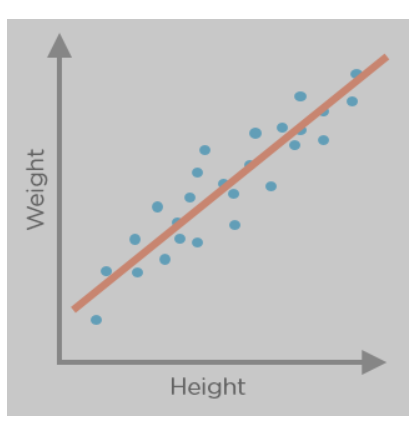







---






In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.utils import shuffle
import warnings
# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
#Validation
from sklearn.metrics import mean_squared_error
import pandas.util.testing as tm

In [37]:
dataurl = 'https://raw.githubusercontent.com/wasif31/Artificial-Intelligence-Course-Lab/main/2.Calculate%20air%20quality%20index%20using%20Linear%20regression/RAW_DATASET_state_weather_aqi_data.csv'
dataframe1 = pd.read_csv(dataurl)
# Dataset is now stored in a Pandas Dataframe


In [38]:
dataframe1.head(10)

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68.0,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77.0,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32.0,NaN,26.0,5.0,6.0,19.0,16.0,32.0,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93.0,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60.0,PM2.5
5,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",05-01-2020,06:00:00,48.0,52.0,25.0,3.0,12.0,43.0,67.0,67.0,OZONE
6,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",05-01-2020,06:00:00,36.0,41.0,31.0,5.0,5.0,33.0,14.0,41.0,PM10
7,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",05-01-2020,06:00:00,27.0,43.0,23.0,3.0,11.0,44.0,61.0,61.0,OZONE
8,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-01-2020,03:00:00,54.0,54.0,15.0,5.0,21.0,30.0,51.0,54.0,PM10
9,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",06-01-2020,03:00:00,48.0,53.0,24.0,3.0,13.0,39.0,69.0,69.0,OZONE


# Field Definations

*   id - unique identified for a house

*   PM2.5 - Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.
Safe Level :
>35.5 to 55.4-Unhealthy for Sensitive Groups,
 >55.5 to 150.4-Unhealthy,
> 150.5 to 250.4-Very Unhealthy ,
>250.5 to 500.4-Hazardous.
*   PM10 - PM10 is particulate matter 10 micrometers or less in diameter,Safe Leve; as under 20 micrograms(W.H.O) per cubic metre. 


* NO2 -Nitrogen Dioxide

*   NH3 - Ammonia
*   CO - Carbon MonoOxide

*   SO2 - Sulpher Di Oxide

*   AQI - Air Quality Index (AQI)



In [39]:
dataframe1.shape
#number of rows,columns

(1573, 14)

In [40]:
dataframe1.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
count,1392.000000,1228.000000,1415.000000,1122.000000,1357.000000,1508.000000,1422.000000,1568.000000
mean,182.898707,141.674267,46.588693,8.402852,16.427413,51.295093,29.813643,188.255102
std,106.272193,66.727131,31.741560,5.591818,12.566816,28.063603,22.739562,98.914736
min,9.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
25%,88.000000,93.000000,23.000000,4.000000,8.000000,30.000000,13.000000,101.000000
50%,164.500000,130.000000,42.000000,7.000000,13.000000,46.000000,25.000000,174.500000
75%,278.250000,184.250000,64.000000,12.000000,20.000000,67.000000,40.000000,278.000000
max,441.000000,394.000000,247.000000,34.000000,92.000000,200.000000,206.000000,441.000000


In [41]:
dataframe1.isnull().sum()

state                      0
city                       0
station                    0
date                       0
time                       0
PM2.5                    181
PM10                     345
NO2                      158
NH3                      451
SO2                      216
CO                        65
OZONE                    151
AQI                        5
Predominant_Parameter    145
dtype: int64

In [42]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1573 non-null   object 
 1   city                   1573 non-null   object 
 2   station                1573 non-null   object 
 3   date                   1573 non-null   object 
 4   time                   1573 non-null   object 
 5   PM2.5                  1392 non-null   float64
 6   PM10                   1228 non-null   float64
 7   NO2                    1415 non-null   float64
 8   NH3                    1122 non-null   float64
 9   SO2                    1357 non-null   float64
 10  CO                     1508 non-null   float64
 11  OZONE                  1422 non-null   float64
 12  AQI                    1568 non-null   float64
 13  Predominant_Parameter  1428 non-null   object 
dtypes: float64(8), object(6)
memory usage: 172.2+ KB


In [43]:
dataframe1['date'] = pd.to_datetime(dataframe1['date'])
#convert datetime to date

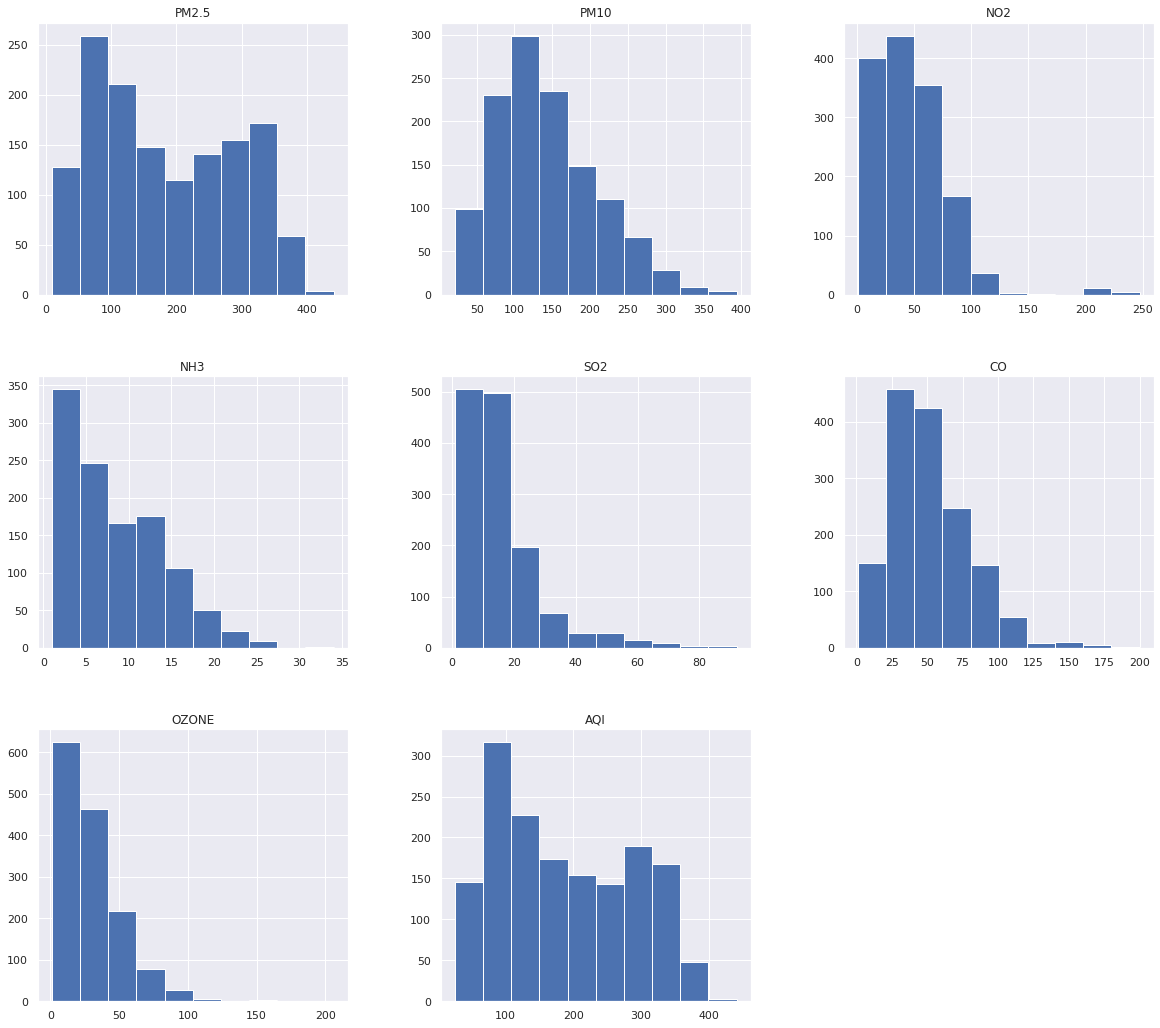

In [44]:
dataframe1.hist(figsize = (20,18));

In [45]:
dataframe1.columns

Index(['state', 'city', 'station', 'date', 'time', 'PM2.5', 'PM10', 'NO2',
       'NH3', 'SO2', 'CO', 'OZONE', 'AQI', 'Predominant_Parameter'],
      dtype='object')

In [46]:
dataframe1.drop(["state"],axis=1,inplace=True)
dataframe1.drop(["city"],axis=1,inplace=True)
dataframe1.drop(["station"],axis=1,inplace=True)
dataframe1.drop(["date"],axis=1,inplace=True)
dataframe1.drop(["time"],axis=1,inplace=True)
dataframe1.drop(["Predominant_Parameter"],axis=1,inplace=True)



In [47]:
dataframe1.head(10)

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68.0
1,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77.0
2,32.0,NaN,26.0,5.0,6.0,19.0,16.0,32.0
3,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93.0
4,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60.0
5,48.0,52.0,25.0,3.0,12.0,43.0,67.0,67.0
6,36.0,41.0,31.0,5.0,5.0,33.0,14.0,41.0
7,27.0,43.0,23.0,3.0,11.0,44.0,61.0,61.0
8,54.0,54.0,15.0,5.0,21.0,30.0,51.0,54.0
9,48.0,53.0,24.0,3.0,13.0,39.0,69.0,69.0


In [48]:
dataframe1.isnull().sum()

PM2.5    181
PM10     345
NO2      158
NH3      451
SO2      216
CO        65
OZONE    151
AQI        5
dtype: int64

In [49]:
dataframe2 = dataframe1[dataframe1['AQI'].notna()]

In [50]:
dataframe2.isnull().sum()

PM2.5    176
PM10     340
NO2      158
NH3      447
SO2      216
CO        65
OZONE    151
AQI        0
dtype: int64

In [51]:

dataframe3 = dataframe2.fillna(dataframe2.mean())

In [52]:
dataframe3.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NH3      0
SO2      0
CO       0
OZONE    0
AQI      0
dtype: int64

In [53]:
dataframe4 = shuffle(dataframe3, random_state=0)
dataframe4 = dataframe4.reset_index(drop=True)

In [54]:
y = dataframe4["AQI"]
x = dataframe4
x.drop(["AQI"],axis=1,inplace=True)
x.head()

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,182.898707,141.674267,46.744681,8.409456,16.461538,46.0,4.0
1,47.000000,46.000000,17.000000,7.000000,16.000000,51.0,6.0
2,319.000000,141.674267,71.000000,8.409456,28.000000,86.0,8.0
3,71.000000,59.000000,22.000000,2.000000,19.000000,19.0,13.0
4,281.000000,195.000000,35.000000,2.000000,46.000000,92.0,5.0


In [55]:
y.head()

0    306.0
1     51.0
2    319.0
3     71.0
4    281.0
Name: AQI, dtype: float64

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model.score(X_test, y_test) * 100

90.55838109340164